In [11]:
import numpy as np
import pandas as pd
import dowhy, dowhy.datasets

In [4]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [16]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.337301,0.0,0.738752,-0.396951,-0.865162,-1.032201,-1.315391,1,True,2.779531
1,1.004384,0.0,0.464666,-1.227907,1.625769,1.605823,0.703794,1,True,18.310811
2,1.256897,0.0,0.755070,-0.215221,1.334069,-1.070386,-0.693181,1,False,2.161647
3,0.874959,0.0,0.891312,-0.524350,1.235501,-0.491898,0.258827,0,True,13.297505
4,2.725850,0.0,0.352112,1.035788,2.690822,1.306621,0.551535,2,False,17.763523
...,...,...,...,...,...,...,...,...,...,...
4995,0.068578,0.0,0.547227,0.695323,1.685177,0.072881,-0.338346,2,True,19.847117
4996,1.551888,0.0,0.445377,-2.026016,-1.079509,0.191120,-0.905417,0,True,1.011169
4997,-0.497553,0.0,0.498590,-1.006103,1.404452,-1.395144,-1.272567,0,False,-2.703185
4998,0.057036,0.0,0.651882,-0.828181,2.571897,-0.270324,-0.343981,3,True,19.149414


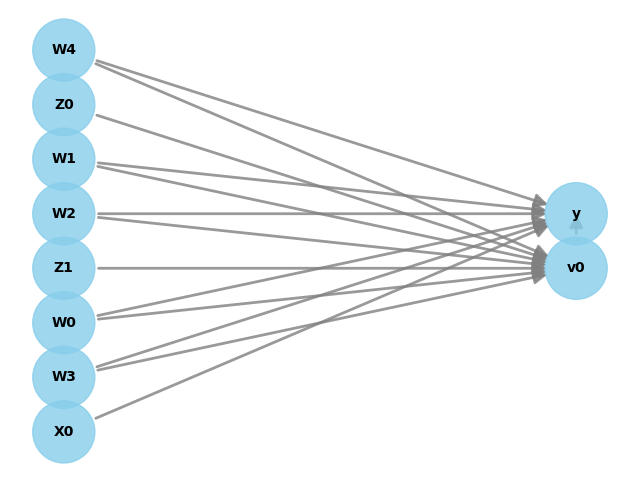

In [21]:
# With graph
model=dowhy.CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )
model.view_model()

In [26]:
# from IPython.display import Image, display
# display(Image(filename="causal_model.png"))

In [27]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W0,W2,W1,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W0,W2,W1,W4,U) = P(y|v0,W3,W0,W2,W1,W4)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
  d                       
─────(E[y|W3,W0,W2,W1,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W0,W2,W1,W4,U) = P(y|v0,W3,W0,W2,W1,W4)

